In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga y limpieza de los datos

## Cargando los datos

In [44]:
BASE_PATH = "dataset"

In [45]:
movies = pd.read_csv(BASE_PATH + '/rotten_tomatoes_movies.csv')
reviews = pd.read_csv(BASE_PATH + '/rotten_tomatoes_critic_reviews.csv')

In [46]:
movies.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [47]:
reviews.describe()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
count,1130017,1111488,1130017,1130017,1130017,824081,1130017,1064211
unique,17712,11108,2,2230,2,814,8015,949181
top,m/star_wars_the_rise_of_skywalker,Emanuel Levy,False,New York Times,Fresh,3/5,2000-01-01,Parental Content Review
freq,992,8173,841481,13293,720210,90273,48019,267


## Checando duplicados

In [48]:
np.sum(movies.duplicated())

0

In [49]:
np.sum(reviews.duplicated())

119471

In [50]:
reviews = reviews.drop_duplicates()
np.sum(reviews.duplicated())

0

## Checando valores nulos

In [51]:
movies.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

Solo nos intersan las películas que cuentan con un rating, ya que es la variable que será usada para medir la disparidad. Por esta razón, eliminamos los registros con valores nulos en `tomatometer_rating` o `audience_rating`.

In [52]:
movies = movies.dropna(subset=["tomatometer_rating", "audience_rating"])

In [53]:
reviews.isnull().sum()

rotten_tomatoes_link         0
critic_name              16454
top_critic                   0
publisher_name               0
review_type                  0
review_score            273605
review_date                  0
review_content           58526
dtype: int64

Para este análisis, solo nos iteresan las reviews que tienen contenido escrito.

In [54]:
reviews = reviews.dropna(subset=['review_content'])

In [56]:
movies.count()

rotten_tomatoes_link                17407
movie_title                         17407
movie_info                          17173
critics_consensus                    9114
content_rating                      17407
genres                              17388
directors                           17229
authors                             15956
actors                              17097
original_release_date               16371
streaming_release_date              17105
runtime                             17169
production_company                  16964
tomatometer_status                  17407
tomatometer_rating                  17407
tomatometer_count                   17407
audience_status                     17255
audience_rating                     17407
audience_count                      17406
tomatometer_top_critics_count       17407
tomatometer_fresh_critics_count     17407
tomatometer_rotten_critics_count    17407
dtype: int64

In [55]:
reviews.count()

rotten_tomatoes_link    952020
critic_name             943125
top_critic              952020
publisher_name          952020
review_type             952020
review_score            678805
review_date             952020
review_content          952020
dtype: int64

# 1. Justificación del problema

In [13]:
movies.tomatometer_status.value_counts()

tomatometer_status
Rotten             7491
Fresh              6658
Certified-Fresh    3258
Name: count, dtype: int64

In [14]:
movies.audience_status.value_counts()

audience_status
Upright    9385
Spilled    7870
Name: count, dtype: int64

Filtramos las películas que fueron Rotten y Upright al mismo tiempo

In [15]:
appealing_to_public = movies[(movies.tomatometer_status == 'Rotten') & (movies.audience_status == 'Upright')]

In [16]:
len(appealing_to_public)

1881

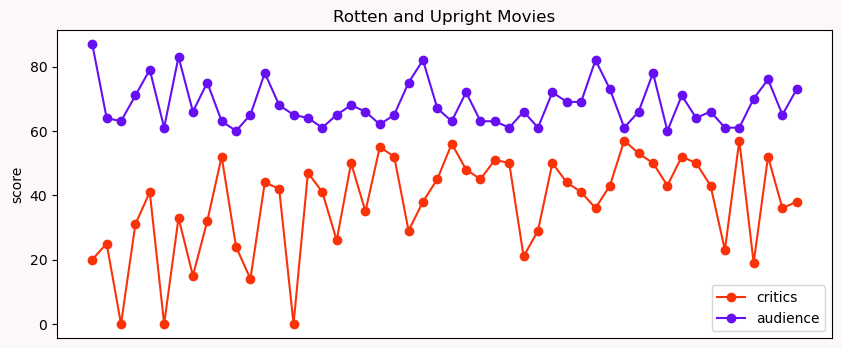

In [70]:
n = 50
plt.figure(figsize=(10, 4))
plt.plot(appealing_to_public.tomatometer_rating[:n].values, marker='o', label='critics', color="#FA3209")
plt.plot(appealing_to_public.audience_rating[:n].values, marker='o', label='audience', color="#6610F2")
plt.legend()
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('score')
plt.title("Rotten and Upright Movies")
plt.gcf().patch.set_facecolor('#FCF7F8')
plt.show()

In [18]:
appealing_to_critics = movies[(movies.tomatometer_status == 'Certified-Fresh') & (movies.audience_status == 'Spilled')]

In [19]:
len(appealing_to_critics)

347

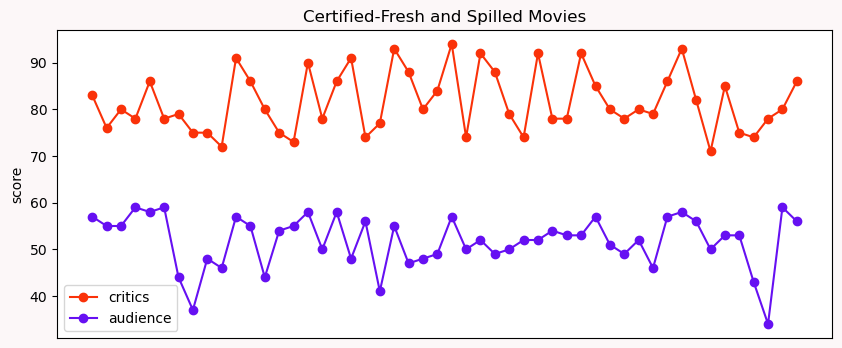

In [72]:
n = 50
plt.figure(figsize=(10, 4))
plt.plot(appealing_to_critics.tomatometer_rating[:n].values, marker='o', label='critics', color="#FA3209")
plt.plot(appealing_to_critics.audience_rating[:n].values, marker='o', label='audience', color="#6610F2")
plt.legend()
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('score')
plt.title("Certified-Fresh and Spilled Movies")
plt.gcf().patch.set_facecolor('#FCF7F8')
plt.show()

# 3. EDA

## 3.1 Distribuciones

Text(0.5, 1.0, 'Distribución de calificaciones de la crítica')

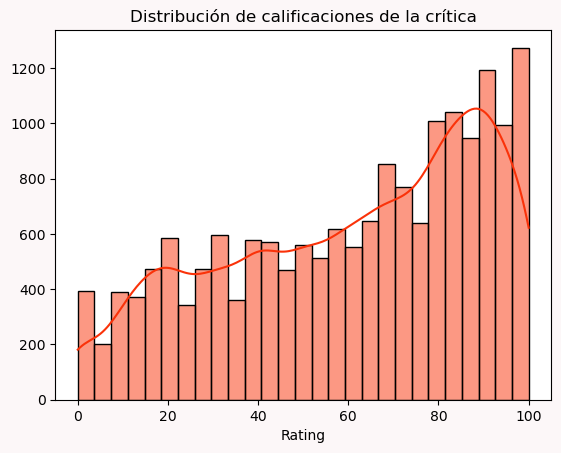

In [78]:
sns.histplot(movies, x='tomatometer_rating', kde=True, color='#FA3209')
ax = plt.gca()
ax.set_xlabel("Rating")
ax.set_ylabel("")

plt.gcf().patch.set_facecolor('#FCF7F8')
plt.title("Distribución de calificaciones de la crítica")

Text(0.5, 1.0, 'Distribución de calificaciones de la audiencia')

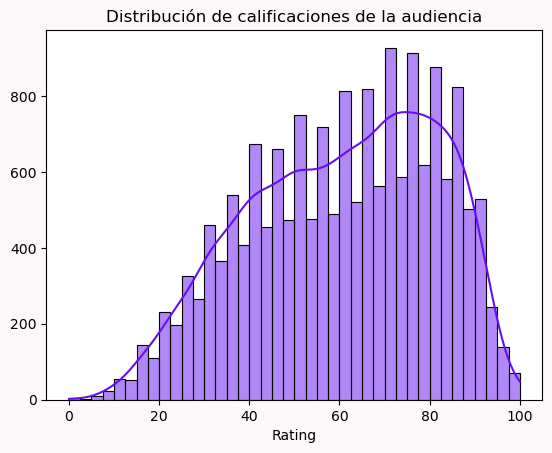

In [79]:
sns.histplot(movies, x='audience_rating', kde=True, color='#6610F2')
ax = plt.gca()
ax.set_xlabel("Rating")
ax.set_ylabel("")

plt.gcf().patch.set_facecolor('#FCF7F8')
plt.title("Distribución de calificaciones de la audiencia")

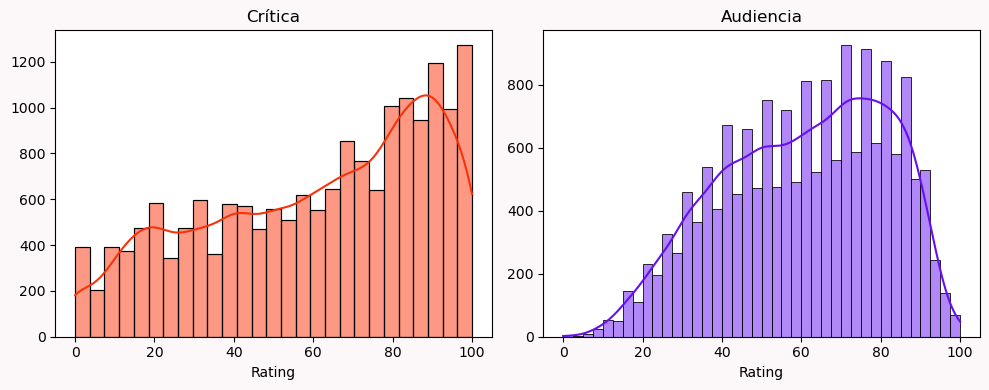

In [99]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First plot: Distribución de calificaciones de la crítica
sns.histplot(movies, x='tomatometer_rating', kde=True, color='#FA3209', ax=axes[0])
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("")
axes[0].set_title("Crítica")

# Second plot: Distribución de calificaciones de la audiencia
sns.histplot(movies, x='audience_rating', kde=True, color='#6610F2', ax=axes[1])
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("")
axes[1].set_title("Audiencia")

fig.patch.set_facecolor('#FCF7F8')

plt.tight_layout()
plt.show()

Text(0.6, 0.7, 'La diferencia fue calculada\nrestando el rating de la audiencia\ndel rating de los críticos.')

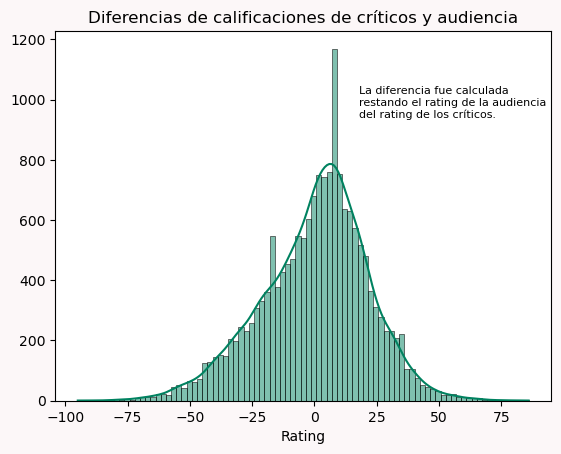

In [133]:
score_diff = movies.tomatometer_rating - movies.audience_rating
sns.histplot(score_diff, color="#008260", kde=True)
ax = plt.gca()
ax.set_xlabel("Rating")
ax.set_ylabel("")

plt.gcf().patch.set_facecolor('#FCF7F8')
plt.title("Diferencias de calificaciones de críticos y audiencia")
plt.figtext(0.6, 0.7, "La diferencia fue calculada\nrestando el rating de la audiencia\ndel rating de los críticos.", fontsize=8)

<Axes: ylabel='Count'>

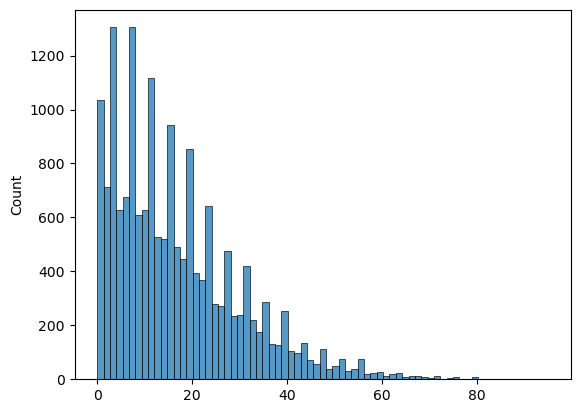

In [94]:
score_diff = np.abs(movies.tomatometer_rating - movies.audience_rating)
sns.histplot(score_diff)

In [24]:
score_diff.describe()

count    17407.000000
mean        16.898834
std         13.444630
min          0.000000
25%          6.500000
50%         14.000000
75%         24.000000
max         95.000000
dtype: float64

Filtrando el Q2

In [25]:
f_score_diff = score_diff[(score_diff > 14)]

<Axes: ylabel='Count'>

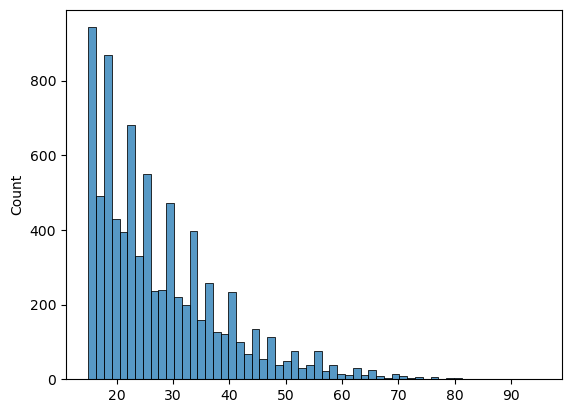

In [26]:
sns.histplot(f_score_diff)

In [27]:
f_movies = movies.loc[f_score_diff.index]

Text(0.5, 1.0, 'Diferencias de calificaciones de críticos y audiencia (para análisis)')

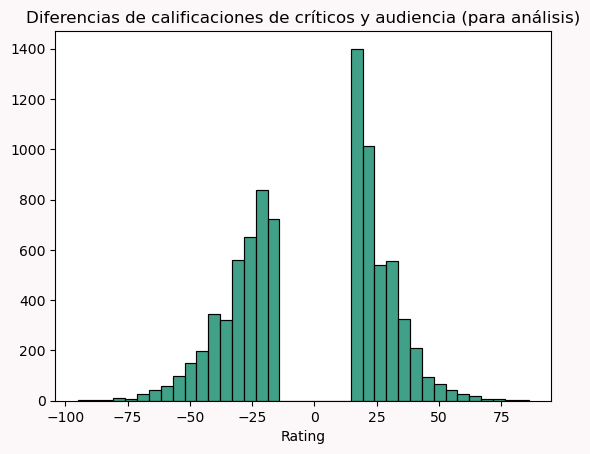

In [138]:
sns.histplot(f_movies.tomatometer_rating - f_movies.audience_rating, color="#008260")
ax = plt.gca()
ax.set_xlabel("Rating")
ax.set_ylabel("")

plt.gcf().patch.set_facecolor('#FCF7F8')
plt.title("Diferencias de calificaciones de críticos y audiencia (para análisis)")

In [29]:
print("Cantidad de películas favorecidas por la audiencia:", np.sum((f_movies.tomatometer_rating - f_movies.audience_rating) < 0))

Cantidad de películas favorecidas por la audiencia: 4041


In [30]:
print("Cantidad de películas favorecidas por la crítica:", np.sum((f_movies.tomatometer_rating - f_movies.audience_rating) > 0))

Cantidad de películas favorecidas por la crítica: 4306


In [31]:
f_audience = f_movies[(f_movies.tomatometer_rating - f_movies.audience_rating) < 0]

In [32]:
f_audience = f_audience[(f_audience.audience_status != 'Spilled') & (f_audience.tomatometer_status == 'Rotten')]

In [33]:
f_audience['score_diff'] = f_audience.audience_rating - f_movies.tomatometer_rating

In [52]:
f_audience.to_csv('audience.csv')

In [34]:
f_critics = f_movies[(f_movies.tomatometer_rating - f_movies.audience_rating) > 0]

In [35]:
f_critics = f_critics[(f_critics.audience_status == 'Spilled') & (f_critics.tomatometer_status != 'Rotten')]

In [36]:
f_critics['score_diff'] = f_critics.tomatometer_rating - f_critics.audience_rating

In [55]:
f_critics.to_csv('critics.csv')

<Axes: xlabel='tomatometer_count', ylabel='Count'>

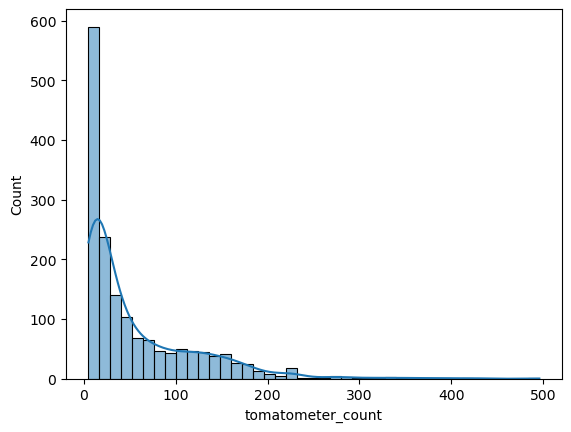

In [37]:
sns.histplot(f_audience.tomatometer_count, kde=True)

In [38]:
f_audience.tomatometer_count.describe()

count    1637.000000
mean       56.150275
std        64.253942
min         5.000000
25%        11.000000
50%        28.000000
75%        83.000000
max       496.000000
Name: tomatometer_count, dtype: float64

In [39]:
f_critics.tomatometer_count.describe()

count    1920.000000
mean       44.266667
std        58.092061
min         5.000000
25%        10.000000
50%        21.000000
75%        51.000000
max       535.000000
Name: tomatometer_count, dtype: float64

In [40]:
reviews.to_csv('reviews.zip')